## Importing the libs

In [86]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

## Set the default style

In [87]:
sns.set_style('darkgrid')
sns.color_palette('deep') # pastle, Set2,...
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.rc('legend', fontsize=13)
plt.rc('font', size=12)
plt.figure(figsize=(8,4), tight_layout=True)

# plt.hist(..., color=sns.color_palette('Set2')[2], linewidth=2)
#ax = sns.histplot(.., palette=Set2, linewidth=2)
# to set labels
# plt.xlabel('')
# plt.ylabel('')
#plt.title('')
# for seaborn
#ax.set(title='', xlabel='', ylabel='')

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

In [88]:
df = pd.read_csv('players_20.csv')

In [89]:
df.describe()

,sofifa_id,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,international_reputation,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18483.000000,18483.000000,18483.000000,18483.000000,18243.000000,18483.000000,18483.000000,1.848300e+04,18483.000000,18483.000000,...,18483.000000,18483.000000,0.0,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000
mean,219768.374885,25.283071,181.348212,75.259049,1.371430,66.198885,71.500893,2.461422e+06,9563.084997,1.102473,...,48.344912,58.470378,NaN,47.603311,45.566196,16.574095,16.353622,16.211221,16.363253,16.706379
std,28047.535516,4.656790,6.760648,7.053023,0.782132,6.950927,6.140787,5.557379e+06,21035.987405,0.377795,...,15.699735,11.885374,NaN,21.573077,21.201937,17.730279,16.985017,16.601642,17.124102,18.027218
min,41.000000,16.000000,155.000000,50.000000,0.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,...,7.000000,12.000000,NaN,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204495.500000,22.000000,177.000000,70.000000,1.000000,62.000000,67.000000,3.250000e+05,2000.000000,1.000000,...,39.000000,51.000000,NaN,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226215.000000,25.000000,181.000000,75.000000,1.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,...,49.000000,59.000000,NaN,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240880.000000,29.000000,186.000000,80.000000,2.000000,71.000000,75.000000,2.000000e+06,9000.000000,1.000000,...,60.000000,67.000000,NaN,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,4.000000,94.000000,95.000000,1.055000e+08,575000.000000,5.000000,...,92.000000,96.000000,NaN,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


In [90]:
df.shape

(18483, 106)

In [91]:
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club_name',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=106)

In [92]:
df['nationality']

0        Argentina
1         Portugal
2           Brazil
3         Slovenia
4          Belgium
           ...    
18478     China PR
18479     China PR
18480     China PR
18481     China PR
18482     China PR
Name: nationality, Length: 18483, dtype: object

In [93]:
countries = ['United States', 'Canada', 'England', 'Brazil', 'Argentina']

In [94]:
df2 = df[df['nationality'].isin(countries)]

In [95]:
df2.shape

(3801, 106)

In [96]:
country_overall = df2.groupby(['nationality'], as_index=False).mean()[['nationality', 'overall']]

<BarContainer object of 5 artists>

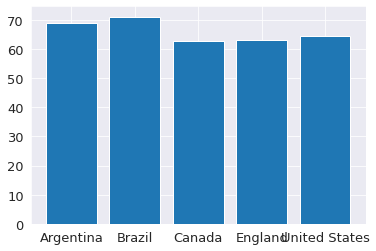

In [97]:
plt.bar(country_overall['nationality'], country_overall['overall'])

Text(0.5, 1.0, 'Average rating for players from different countries')

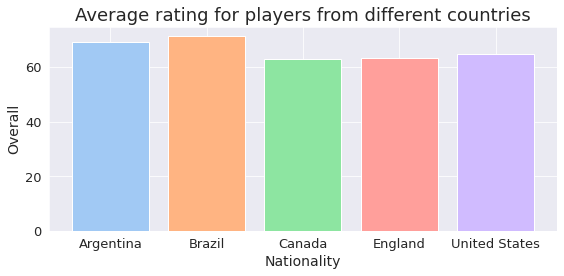

In [98]:
plt.figure(figsize=(8, 4), tight_layout=True)

plt.bar(country_overall['nationality'], country_overall['overall'], color=sns.color_palette('pastel')[:5])
plt.xlabel('Nationality')
plt.ylabel('Overall')
plt.title('Average rating for players from different countries')

In [99]:
top20_df = pd.concat([df[df['nationality'] == countries[0]][:20],
           df[df['nationality'] == countries[1]][:20],
           df[df['nationality'] == countries[2]][:20],
           df[df['nationality'] == countries[3]][:20],
           df[df['nationality'] == countries[4]][:20]])

In [100]:
top20 = top20_df.groupby('nationality', as_index=False).mean()[['nationality', 'overall']]

Text(0.5, 1.0, 'the top 20 for each country')

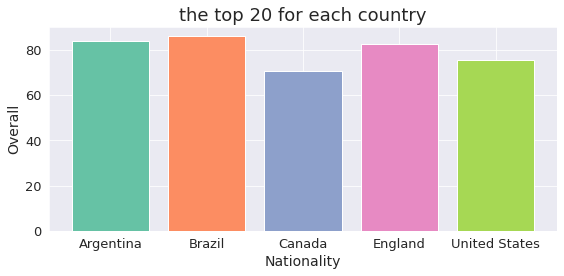

In [101]:
plt.figure(figsize=(8,4), tight_layout=True)
plt.bar(top20['nationality'], top20['overall'], color=sns.color_palette('Set2')[:5])
plt.xlabel('Nationality')
plt.ylabel('Overall')
plt.title('the top 20 for each country')

In [102]:
heights = df.groupby('nationality', as_index=False).mean()[['nationality','height_cm']]

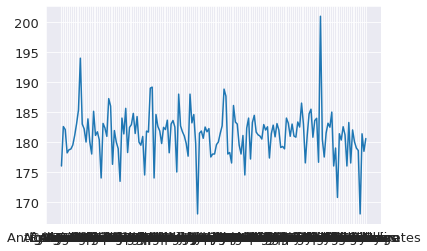

In [103]:
plt.plot(heights['nationality'], heights['height_cm'])

In [104]:
heights2 = heights[heights['height_cm'] > 182]

Text(0, 0.5, 'Average height in cm')

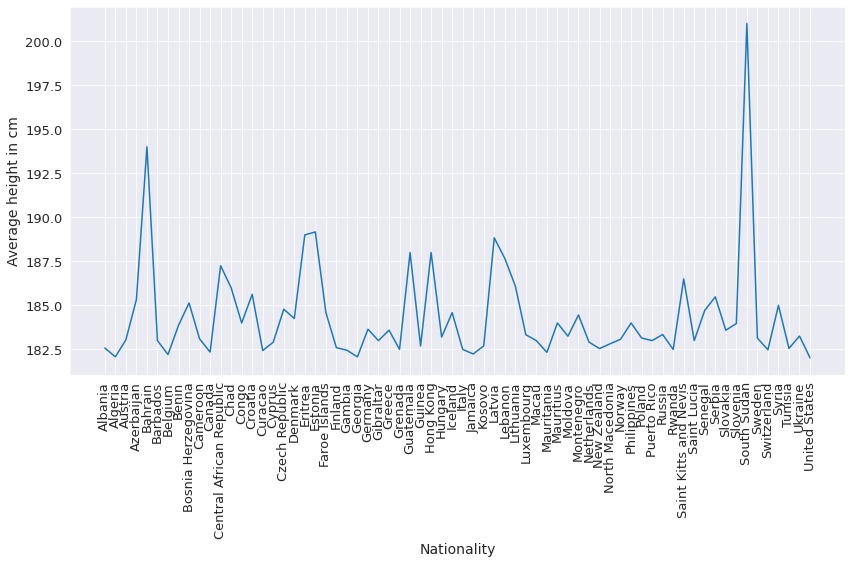

In [111]:
plt.figure(figsize=(12,8), tight_layout=True)
plt.plot(heights2['nationality'], heights2['height_cm'])
plt.xlabel('Nationality')
plt.xticks(rotation=90)
plt.ylabel('Average height in cm')

## Leaque info

In [130]:
df_league = df2[df2['league_name'].isin(['Spain Primera Division', 'Italian Serie A', 'German 1. Bundesliga'])]

In [131]:
df_league_gb = df_league.groupby(['nationality', 'league_name'], as_index=False).count()

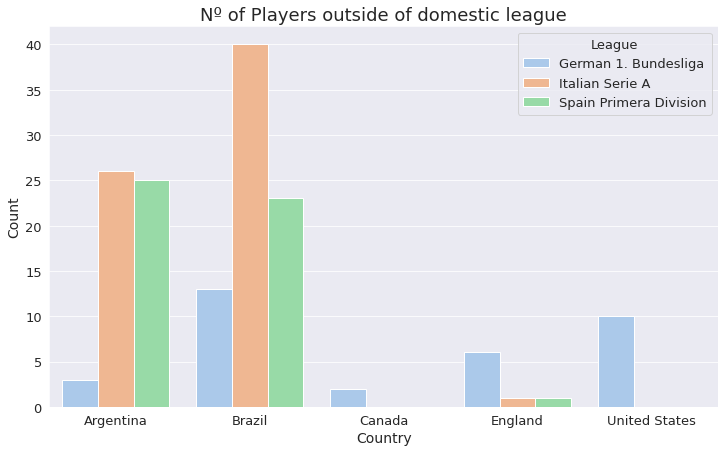

In [139]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x = df_league_gb['nationality'], y = df_league_gb['sofifa_id'], hue=df_league_gb['league_name'], palette='pastel' )
ax.set(title='Nº of Players outside of domestic league' ,xlabel='Country', ylabel='Count')
ax.legend(title='League', title_fontsize='13', loc='upper right')
plt.show()

In [133]:
df_league_gb

,nationality,league_name,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,Argentina,German 1. Bundesliga,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,Argentina,Italian Serie A,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26
2,Argentina,Spain Primera Division,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
3,Brazil,German 1. Bundesliga,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
4,Brazil,Italian Serie A,40,40,40,40,40,40,40,40,...,40,40,40,40,40,40,40,40,40,40
5,Brazil,Spain Primera Division,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
6,Canada,German 1. Bundesliga,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
7,England,German 1. Bundesliga,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
8,England,Italian Serie A,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9,England,Spain Primera Division,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
bins = list(range(160, 205, 5)) #[160, 165, 170, 175, 180, 185, 190, 195, 200]

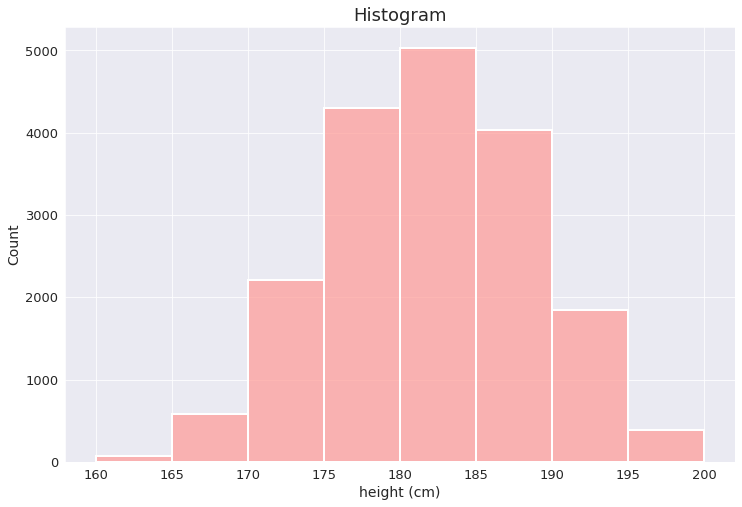

In [152]:
plt.figure(figsize=(12,8))
ax = sns.histplot(df['height_cm'], color=sns.color_palette('pastel')[3], linewidth=2, bins=bins)
ax.set(title='Histogram', xlabel='height (cm)', ylabel='Count')
plt.show()

Text(0.5, 1.0, 'Hisogram')

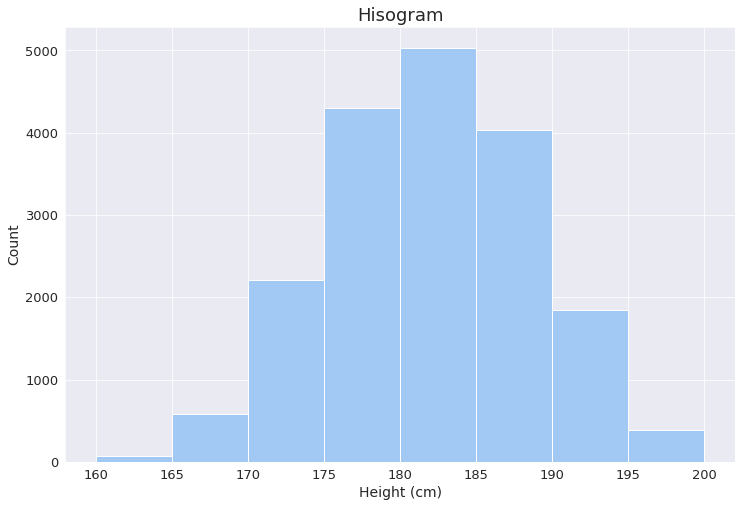

In [153]:
plt.figure(figsize=(12,8))

plt.hist(df['height_cm'], bins=bins, color=sns.color_palette('pastel')[0])
plt.xlabel('Height (cm)')
plt.ylabel('Count')
plt.title('Hisogram')


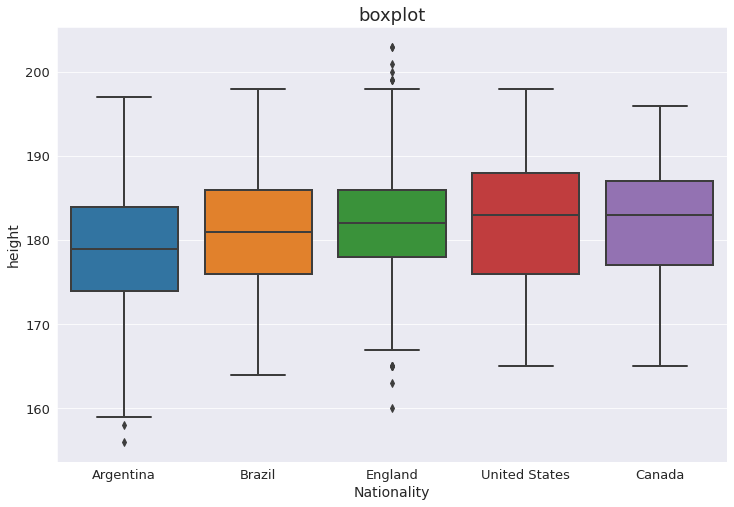

In [155]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x=df2['nationality'], y=df2['height_cm'], linewidth=2)
ax.set(title='boxplot', xlabel='Nationality', ylabel='height')
plt.show()

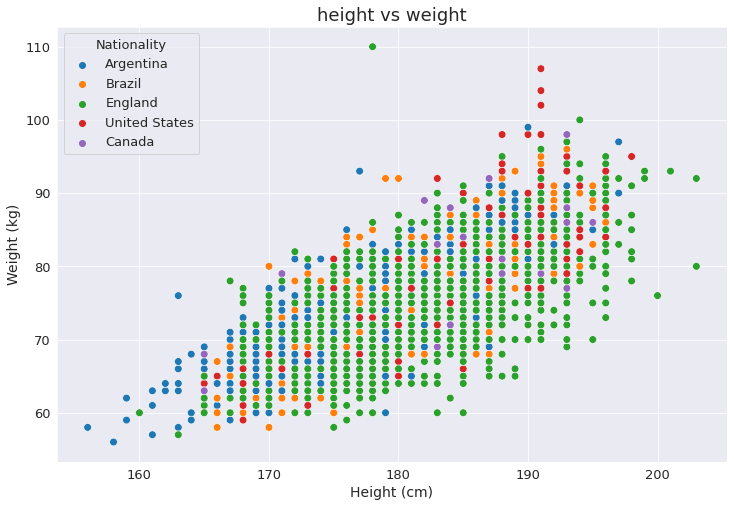

In [161]:
# The relationship between height and weight
plt.figure(figsize=(12,8))
ax = sns.scatterplot(data=df2, x=df2['height_cm'], y=df2['weight_kg'],hue=df2['nationality'],s=60)
ax.set(title='height vs weight', xlabel='Height (cm)', ylabel='Weight (kg)')
ax.legend(title='Nationality',title_fontsize='13', loc='upper left')
plt.show()

In [168]:
pie = df[df['club_name']=='Chelsea']
pie_data = pie.sort_values('value_eur', ascending=True)[['short_name', 'value_eur']]
pie_data[:11]

,short_name,value_eur
17543,J. Cumming,120000
1893,W. Caballero,675000
13217,B. Gilmour,675000
5978,J. Blackman,1000000
3598,M. Hector,3300000
3599,Lucas Piazon,3800000
3315,F. Tomori,4900000
2262,A. Baba,6500000
2658,R. James,7000000
1666,Kenedy,9500000


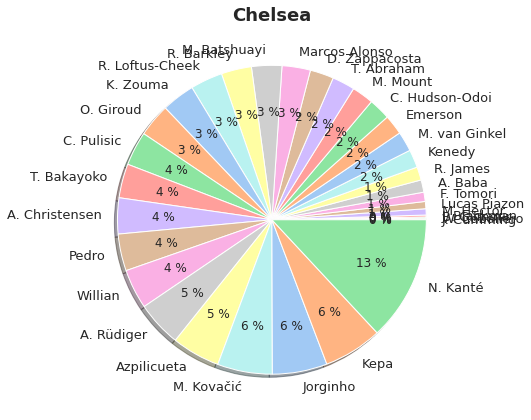

In [177]:
colors = sns.color_palette('pastel')
plt.figure(figsize=(7, 6), tight_layout=True)
explode_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2]
plt.pie(pie_data['value_eur'], labels=pie_data['short_name'], autopct='%.0f %%', pctdistance=.7,
          colors=colors, shadow=True)
plt.title('Chelsea', weight='bold')
plt.show()